In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
filename_df = pd.read_csv("/content/Data Rumah Sakit di Surakarta - Sheet2.csv")
filename_df.head()

,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS
0,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,ICU,NaN,31,0
1,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,VVIP/Super VIP,NaN,4,0
2,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,VIP,NaN,52,0
3,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,Kelas I,"Ruang ANGGREK III - PALIATIF CARE, ANGGREK III...",61,0
4,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,Kelas II,"Ruang ANGGREK III - PALIATIF CARE, ANGGREK III...",62,0


In [3]:
filename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kode Rumah Sakit  104 non-null    float64
 1   Nama Rumah Sakit  105 non-null    object 
 2   Tipe              105 non-null    object 
 3   Alamat            105 non-null    object 
 4   Latitude          105 non-null    float64
 5   Longitude         105 non-null    float64
 6   Telepon           105 non-null    object 
 7   Email             73 non-null     object 
 8   Kelas             105 non-null    object 
 9   Kamar             34 non-null     object 
 10  Jumlah Bed        105 non-null    int64  
 11  BPJS              105 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 10.0+ KB


In [4]:
filename_df.shape

(105, 12)

In [5]:
best_rs = filename_df.sort_values(by=['Tipe', 'BPJS'], ascending = False)
best_rs

,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS
62,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,ICU,NaN,4,0
63,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,VVIP/Super VIP,NaN,1,0
64,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,VIP,NaN,5,0
65,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,Kelas I,Ruang 11,22,0
66,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,Kelas II,Ruang 10,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.5564,110.8633,0271-641442,rsjd_surakarta@yahoo.com,ICU,NaN,4,0
47,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.5564,110.8633,0271-641442,rsjd_surakarta@yahoo.com,VIP,NaN,16,0
48,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.5564,110.8633,0271-641442,rsjd_surakarta@yahoo.com,Kelas I,"Ruang KRESNA, Ruang WISANGGENI, Ruang BISMA, R...",16,0
49,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.5564,110.8633,0271-641442,rsjd_surakarta@yahoo.com,Kelas II,"Ruang SAMBA, Ruang DRUPADI, Ruang SADEWA, Ruan...",41,0


In [6]:
# Mencari nilai K
coordinates = filename_df[['Longitude', 'Latitude']]

distortions = []
K = range(1,10)
for k in K:
  kmeansModel = KMeans(n_clusters = k)
  kmeansModel = kmeansModel.fit(coordinates)
  distortions.append(kmeansModel.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [7]:
score_dist = pd.DataFrame({'Cluster' : K, 'Value' : distortions})
score_dist

,Cluster,Value
0,1,0.068906
1,2,0.028885
2,3,0.021022
3,4,0.013196
4,5,0.006742
5,6,0.004217
6,7,0.002531
7,8,0.001874
8,9,0.001392


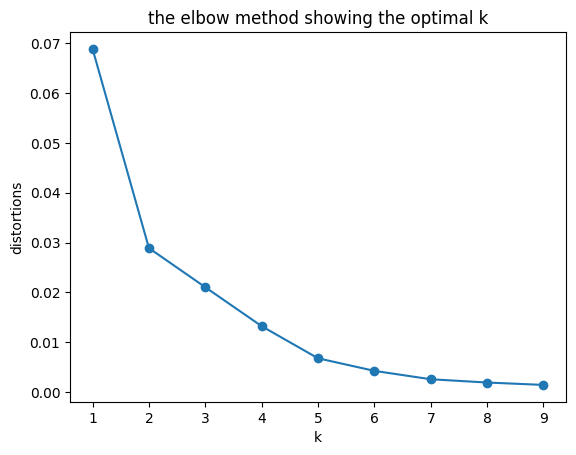

In [8]:
plt.plot(K, distortions, marker = 'o')
plt.xlabel('k')
plt.ylabel('distortions')
plt.title('the elbow method showing the optimal k')
plt.show()

In [9]:
silhouette = []

K = range(2, 11)
for k in K:
  labels = KMeans(n_clusters = k, init = 'k-means++').fit(coordinates).labels_
  silhouette.append(metrics.silhouette_score(coordinates, labels, metric = 'euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
sil_score = pd.DataFrame({'Cluster' : K, 'Score' : silhouette})
sil_score

,Cluster,Score
0,2,0.519345
1,3,0.468751
2,4,0.560169
3,5,0.654137
4,6,0.685591
5,7,0.717753
6,8,0.685116
7,9,0.769632
8,10,0.811901


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


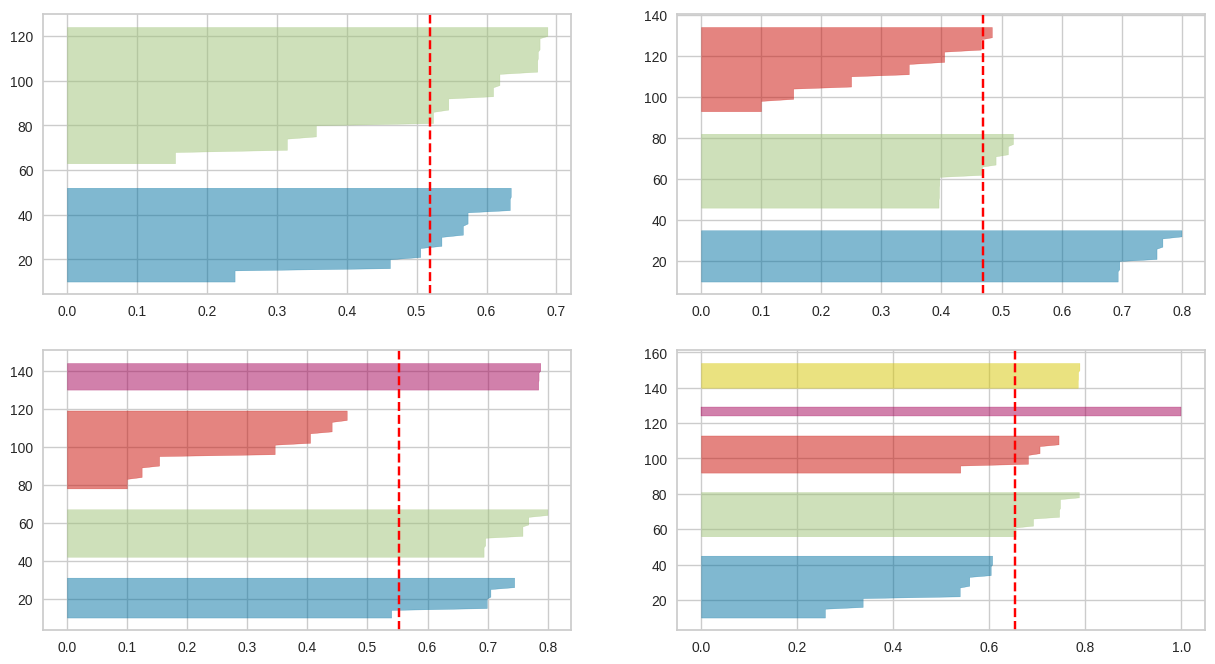

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize = (15, 8))
K = [2, 3, 4, 5]
for k in K:
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  q, mod =divmod(k, 2)
  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(coordinates)

In [12]:
labels = KMeans(n_clusters = 5, init = 'k-means++').fit(coordinates).labels_
print('k = 5', 'silhouette_score', metrics.silhouette_score(coordinates, labels, metric = 'euclidean'))

k = 5 silhouette_score 0.654136568338632


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
filename_df['Cluster'] = kmeans.predict(filename_df[['Longitude', 'Latitude']])
filename_df

,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS,Cluster
0,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,ICU,NaN,31,0,2
1,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,VVIP/Super VIP,NaN,4,0,2
2,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,VIP,NaN,52,0,2
3,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,Kelas I,"Ruang ANGGREK III - PALIATIF CARE, ANGGREK III...",61,0,2
4,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,Kelas II,"Ruang ANGGREK III - PALIATIF CARE, ANGGREK III...",62,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,3372234.0,RS Umum Daerah Ibu Fatmawati Soekarno,C,Jl. Lettu Sumarto No. 1 Kel. Kadipiro Kec. Ban...,-7.52620,110.812800,0271-715300,NaN,VVIP/Super VIP,NaN,0,0,3
101,3372234.0,RS Umum Daerah Ibu Fatmawati Soekarno,C,Jl. Lettu Sumarto No. 1 Kel. Kadipiro Kec. Ban...,-7.52620,110.812800,0271-715300,NaN,VIP,NaN,1,0,3
102,3372234.0,RS Umum Daerah Ibu Fatmawati Soekarno,C,Jl. Lettu Sumarto No. 1 Kel. Kadipiro Kec. Ban...,-7.52620,110.812800,0271-715300,NaN,Kelas I,Ruang,9,0,3
103,3372234.0,RS Umum Daerah Ibu Fatmawati Soekarno,C,Jl. Lettu Sumarto No. 1 Kel. Kadipiro Kec. Ban...,-7.52620,110.812800,0271-715300,NaN,Kelas II,Ruang,18,0,3


In [14]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3], dtype=int32)

In [15]:
best_rs = filename_df.sort_values(by=['Tipe', 'BPJS'], ascending = False)
best_rs

,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS,Cluster
62,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,ICU,NaN,4,0,0
63,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,VVIP/Super VIP,NaN,1,0,0
64,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,VIP,NaN,5,0,0
65,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,Kelas I,Ruang 11,22,0,0
66,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.5576,110.8250,0271-656903,triharsi.solo@gmail.com,Kelas II,Ruang 10,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.5564,110.8633,0271-641442,rsjd_surakarta@yahoo.com,ICU,NaN,4,0,2
47,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.5564,110.8633,0271-641442,rsjd_surakarta@yahoo.com,VIP,NaN,16,0,2
48,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.5564,110.8633,0271-641442,rsjd_surakarta@yahoo.com,Kelas I,"Ruang KRESNA, Ruang WISANGGENI, Ruang BISMA, R...",16,0,2
49,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.5564,110.8633,0271-641442,rsjd_surakarta@yahoo.com,Kelas II,"Ruang SAMBA, Ruang DRUPADI, Ruang SADEWA, Ruan...",41,0,2


In [19]:
def recommended_hospitals(filename_df, Longitude, Latitude, Kelas, Jumlah_Bed):
  Cluster = kmeans.predict(tf.reshape(np.array([Longitude, Latitude]), (1, -1)))[0]
  print(Cluster)
  return filename_df[filename_df['Cluster']==Cluster].iloc[:50][['Nama Rumah Sakit', 'Latitude', 'Longitude', 'Kelas', 'Jumlah Bed']]

In [20]:
rec_hosp = recommended_hospitals(best_rs, 110.85664241141414, -7.5523142693779475, 'Kelas', 'Jumlah_Bed')
rec_hosp

2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,Nama Rumah Sakit,Latitude,Longitude,Kelas,Jumlah Bed
41,RS Umum Hermina Solo,-7.560000,110.840194,ICU,8
42,RS Umum Hermina Solo,-7.560000,110.840194,VIP,9
43,RS Umum Hermina Solo,-7.560000,110.840194,Kelas I,23
44,RS Umum Hermina Solo,-7.560000,110.840194,Kelas II,16
45,RS Umum Hermina Solo,-7.560000,110.840194,Kelas III,26
6,RS Umum Dr. Oen,-7.555617,110.837808,ICU,18
7,RS Umum Dr. Oen,-7.555617,110.837808,VVIP/Super VIP,9
8,RS Umum Dr. Oen,-7.555617,110.837808,VIP,41
9,RS Umum Dr. Oen,-7.555617,110.837808,Kelas I,3
10,RS Umum Dr. Oen,-7.555617,110.837808,Kelas II,10


In [21]:
rec_hosp = recommended_hospitals(best_rs, 110.82712799471938, -7.554579806884118, 'Kelas', 'Jumlah Bed')
rec_hosp

0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,Nama Rumah Sakit,Latitude,Longitude,Kelas,Jumlah Bed
62,RS Umum Triharsi,-7.557600,110.825000,ICU,4
63,RS Umum Triharsi,-7.557600,110.825000,VVIP/Super VIP,1
64,RS Umum Triharsi,-7.557600,110.825000,VIP,5
65,RS Umum Triharsi,-7.557600,110.825000,Kelas I,22
66,RS Umum Triharsi,-7.557600,110.825000,Kelas II,20
67,RS Umum Triharsi,-7.557600,110.825000,Kelas III,24
73,RS Gigi dan Mulut Soelastri,-7.565111,110.806852,ICU,1
74,RS Gigi dan Mulut Soelastri,-7.565111,110.806852,VVIP/Super VIP,1
75,RS Gigi dan Mulut Soelastri,-7.565111,110.806852,VIP,1
76,RS Gigi dan Mulut Soelastri,-7.565111,110.806852,Kelas I,2
